In [1]:
import requests
import json
import time
import pandas as pd
import os
import random

import winsound

url = 'https://s.search.bilibili.com/cate/search?'
head=[
    "Mozilla/5.0 (Windows NT 6.0; rv:2.0) Gecko/20100101 Firefox/4.0 Opera 12.14",
    "Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.0) Opera 12.14",
    "Opera/12.80 (Windows NT 5.1; U; en) Presto/2.10.289 Version/12.02",
    "Opera/9.80 (Windows NT 6.1; U; es-ES) Presto/2.9.181 Version/12.00",
    "Opera/9.80 (Windows NT 5.1; U; zh-sg) Presto/2.9.181 Version/12.00",
]
headers={
    'user-agent':random.choice(head),
    'refer':'https://www.bilibili.com/'
}
def get_inf(url,headers,num):
    df = []
    for page in range(num):
        params = {
            'main_ver': 'v3',
            'search_type': 'video',
            'view_type': 'hot_rank',
            'order': 'click',
            'copy_right': -1,
            'cate_id': 182,  # 以影视区影视杂谈板块为例，cate_id=182
            'page': page,
            'pagesize': 20,
            'jsonp': 'jsonp',
            'time_from': 20211121,
            'time_to': 20211128
        }
        try:
            r = requests.get(url,headers=headers,params=params)
            data = json.loads(r.text)
            inf_list = data['result']
            for i in range(len(inf_list)):
                author = data['result'][i]['author']
                author_id = data['result'][i]['mid']
                duration = data['result'][i]['duration']
                collection = data['result'][i]['favorites']
                aid = data['result'][i]['id']
                title = data['result'][i]['title']
                pubdate = data['result'][i]['pubdate']
                review = data['result'][i]['review']
                play = data['result'][i]['play']
                df.append([author,author_id,title,pubdate,aid,duration,play,review,collection])
            print('第{}页爬取完毕'.format(page+1))
            time.sleep(random.randint(1,2))
        except:
            print('未爬到数据')
    df = pd.DataFrame(df,columns=['UP主','mid','视频标题','发布时间','aid','视频时长','播放量','评论数','收藏数'])
    df.to_csv('bilibili.csv',encoding='utf-8-sig',index=False)
    print('共{}条热门视频信息'.format(len(df)))
if __name__=='__main__':
    start = time.time()
    num = 10  # 爬取视频页数
    get_inf(url,headers,num)
    end = time.time()
    print('共花费{}分钟'.format(round((end-start)/60,2)))

winsound.PlaySound("SpeechOn.wav",winsound.SND_FILENAME)


第1页爬取完毕
第2页爬取完毕
第3页爬取完毕
第4页爬取完毕
第5页爬取完毕
第6页爬取完毕
第7页爬取完毕
第8页爬取完毕
第9页爬取完毕
第10页爬取完毕
共200条热门视频信息
共花费0.29分钟


In [2]:
import pandas as pd

newfile = './bilibili.csv'
newdata = pd.read_csv(newfile, encoding='utf-8')
up_name_id = newdata.iloc[:,:2]
#newdata = newdata.iloc[:,1]
#newdata
up_name_id.values

array([['贤聊电影', 1108782940],
       ['快聊影院', 1581017398],
       ['想睡在迪士尼的小可爱', 1891369254],
       ['火龙果讲电影', 646695716],
       ['痞叔说电影', 698329270],
       ['老实人讲电影', 1889744808],
       ['吖吖侃电影', 436885385],
       ['欢颜侃电影', 1494662203],
       ['沈腾的义子', 248381403],
       ['企鹅人的马甲', 1009757374],
       ['效忠东城卫', 289926882],
       ['介么追剧', 1296385136],
       ['温情说剧', 2090455469],
       ['军师电影解说', 522159107],
       ['贤聊电影', 1108782940],
       ['小妖儿看电影', 2054675333],
       ['木鱼水心', 927587],
       ['企鹅人的马甲', 1009757374],
       ['布衣探案', 282527570],
       ['木鱼水心', 927587],
       ['贤聊电影', 1108782940],
       ['快聊影院', 1581017398],
       ['想睡在迪士尼的小可爱', 1891369254],
       ['火龙果讲电影', 646695716],
       ['痞叔说电影', 698329270],
       ['老实人讲电影', 1889744808],
       ['吖吖侃电影', 436885385],
       ['欢颜侃电影', 1494662203],
       ['沈腾的义子', 248381403],
       ['企鹅人的马甲', 1009757374],
       ['效忠东城卫', 289926882],
       ['介么追剧', 1296385136],
       ['温情说剧', 2090455469],
       ['军师电影解说', 52215

In [3]:
# 获取粉丝数量信息

#url = 'https://api.bilibili.com/x/relation/stat?vmid=927587'

import requests
fans = []

def get_star(url,index):
    html = requests.get(url).json()['data']
    follower = html['follower']
    following = html['following']
    temp = []
    temp.append(up_name_id.values[index][0])
    temp.append(follower)
    print("粉丝数：{}，关注数：{}".format(follower,following))
    print("-"*20)
    return temp

def main():
    for i in range(len(up_name_id)):
        url2 = "https://api.bilibili.com/x/relation/stat?vmid={}".format(int(up_name_id.values[i][1]))
        temp = get_star(url2, i)
        fans.append(temp)

if __name__ == '__main__':
    main()

winsound.PlaySound("SpeechOn.wav",winsound.SND_FILENAME)

粉丝数：5643，关注数：3
--------------------
粉丝数：1649，关注数：4
--------------------
粉丝数：60250，关注数：4
--------------------
粉丝数：383388，关注数：22
--------------------
粉丝数：3885，关注数：9
--------------------
粉丝数：29980，关注数：3
--------------------
粉丝数：23190，关注数：3
--------------------
粉丝数：3905，关注数：18
--------------------
粉丝数：7489，关注数：0
--------------------
粉丝数：51284，关注数：1
--------------------
粉丝数：30294，关注数：13
--------------------
粉丝数：6122，关注数：19
--------------------
粉丝数：784，关注数：2
--------------------
粉丝数：84949，关注数：26
--------------------
粉丝数：5643，关注数：3
--------------------
粉丝数：2912，关注数：4
--------------------
粉丝数：8320747，关注数：65
--------------------
粉丝数：51284，关注数：1
--------------------
粉丝数：258703，关注数：10
--------------------
粉丝数：8320747，关注数：65
--------------------
粉丝数：5643，关注数：3
--------------------
粉丝数：1649，关注数：4
--------------------
粉丝数：60250，关注数：4
--------------------
粉丝数：383388，关注数：22
--------------------
粉丝数：3885，关注数：9
--------------------
粉丝数：29980，关注数：3
--------------------
粉丝数：23190，关注数：3
-------------------

In [4]:
fans

[['贤聊电影', 5643],
 ['快聊影院', 1649],
 ['想睡在迪士尼的小可爱', 60250],
 ['火龙果讲电影', 383388],
 ['痞叔说电影', 3885],
 ['老实人讲电影', 29980],
 ['吖吖侃电影', 23190],
 ['欢颜侃电影', 3905],
 ['沈腾的义子', 7489],
 ['企鹅人的马甲', 51284],
 ['效忠东城卫', 30294],
 ['介么追剧', 6122],
 ['温情说剧', 784],
 ['军师电影解说', 84949],
 ['贤聊电影', 5643],
 ['小妖儿看电影', 2912],
 ['木鱼水心', 8320747],
 ['企鹅人的马甲', 51284],
 ['布衣探案', 258703],
 ['木鱼水心', 8320747],
 ['贤聊电影', 5643],
 ['快聊影院', 1649],
 ['想睡在迪士尼的小可爱', 60250],
 ['火龙果讲电影', 383388],
 ['痞叔说电影', 3885],
 ['老实人讲电影', 29980],
 ['吖吖侃电影', 23190],
 ['欢颜侃电影', 3905],
 ['沈腾的义子', 7489],
 ['企鹅人的马甲', 51284],
 ['效忠东城卫', 30294],
 ['介么追剧', 6122],
 ['温情说剧', 784],
 ['军师电影解说', 84949],
 ['贤聊电影', 5643],
 ['小妖儿看电影', 2912],
 ['木鱼水心', 8320748],
 ['企鹅人的马甲', 51284],
 ['布衣探案', 258703],
 ['木鱼水心', 8320748],
 ['木鱼水心', 8320748],
 ['青史刘明', 16180],
 ['干饭人九迁', 7020],
 ['无言卒电影', 73787],
 ['翠花不瞎说', 11975],
 ['电影叮咚叮', 11774],
 ['雪山扯电影', 19008],
 ['影探阿斌', 16944],
 ['吖吖侃电影', 23190],
 ['摸鱼电影V', 795],
 ['猫君影视', 27107],
 ['黑菠萝说电影', 228925],
 ['千帆电影', 9827],


In [5]:
# 排序

final = pd.DataFrame(fans)
a = final.drop_duplicates(subset=[0],keep='first')
print(a)

df_sort = a.sort_values(by=1, ascending=True)
# 查看排序结果
df_sort.tail(20)

              0       1
0          贤聊电影    5643
1          快聊影院    1649
2    想睡在迪士尼的小可爱   60250
3        火龙果讲电影  383388
4         痞叔说电影    3885
..          ...     ...
192        护10娘   36360
193        橘子观影     235
194      十一关说电影   30848
198        盒中怪咖    5544
199          即录   31923

[136 rows x 2 columns]


,0,1
159,噬元兽影视,322487
3,火龙果讲电影,383388
76,电影冷知识,387968
124,王左中右,447620
93,柳飘飘了吗,540530
182,bilibili星访问,912904
68,绫人太太啊,915381
106,1900影剧室,1259246
79,芙芙家的洗碗君,1319050
152,哇哇哇妹,1432586


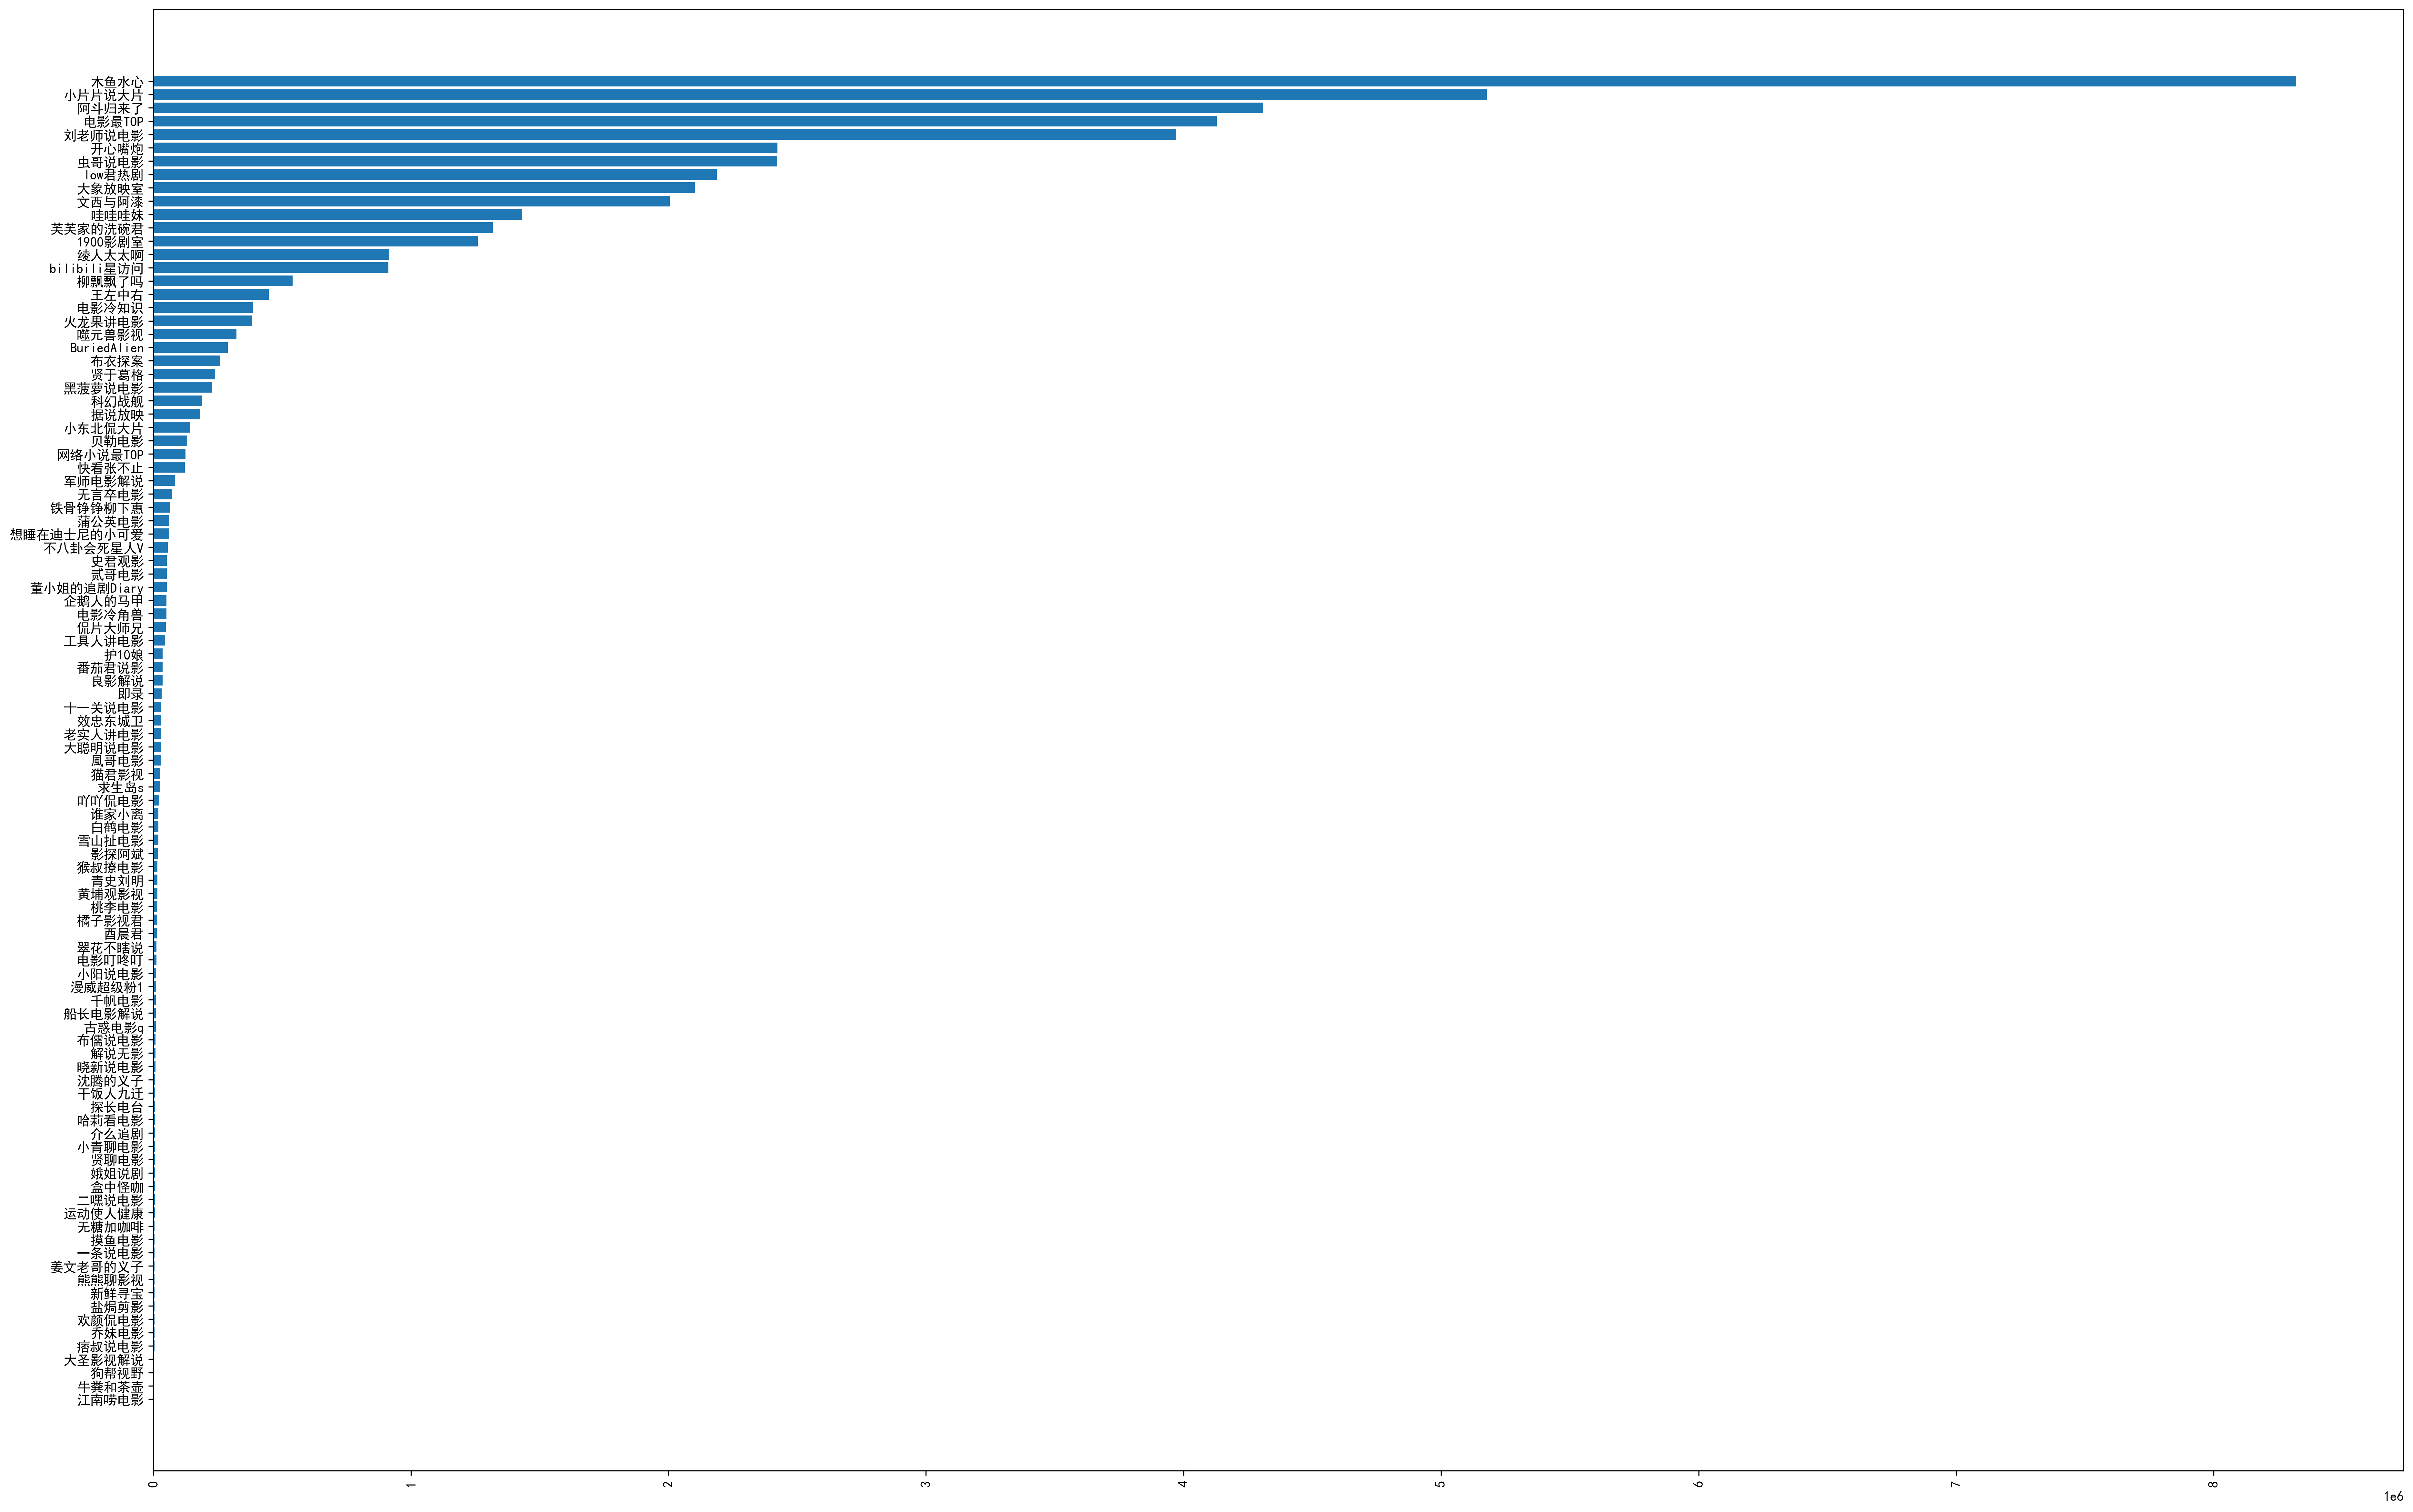

In [6]:
import matplotlib.pyplot as plt
#解决matplotlib绘图中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['font.sans-serif'] = ['KaiTi']   # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False   # 解决保存图像是负号'-'显示为方块的问题

plt.figure(dpi=300,figsize=(30,20))
x = df_sort.iloc[:,0].tail(100)
y = df_sort.iloc[:,1].tail(100)
plt.barh(x,y)
plt.xticks(rotation=90)
plt.savefig('./fans_sort.jpg')
plt.show()